    Importing the required libraries and  models

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Data Visualisation
import seaborn as sns # Data Visualisation
from collections import Counter as c   #importing collections
from matplotlib.pyplot import plot  #importing matplotlib llibrary
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

    Feeding the model with the dataset

In [2]:
df=pd.read_csv(r"C:\Users\ASUS\Downloads\h1b_kaggle.csv")
df.shape

(3002458, 11)

In [3]:
# lists the five rows of the dataset
df.head()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003


In [4]:
# Gives the information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3002458 entries, 0 to 3002457
Data columns (total 11 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Unnamed: 0          int64  
 1   CASE_STATUS         object 
 2   EMPLOYER_NAME       object 
 3   SOC_NAME            object 
 4   JOB_TITLE           object 
 5   FULL_TIME_POSITION  object 
 6   PREVAILING_WAGE     float64
 7   YEAR                float64
 8   WORKSITE            object 
 9   lon                 float64
 10  lat                 float64
dtypes: float64(4), int64(1), object(6)
memory usage: 252.0+ MB


     CASE_STATUS Column

In [5]:
#gives the count of each classes of case status
df.CASE_STATUS.value_counts() 

CERTIFIED                                             2615623
CERTIFIED-WITHDRAWN                                    202659
DENIED                                                  94346
WITHDRAWN                                               89799
PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED         15
REJECTED                                                    2
INVALIDATED                                                 1
Name: CASE_STATUS, dtype: int64

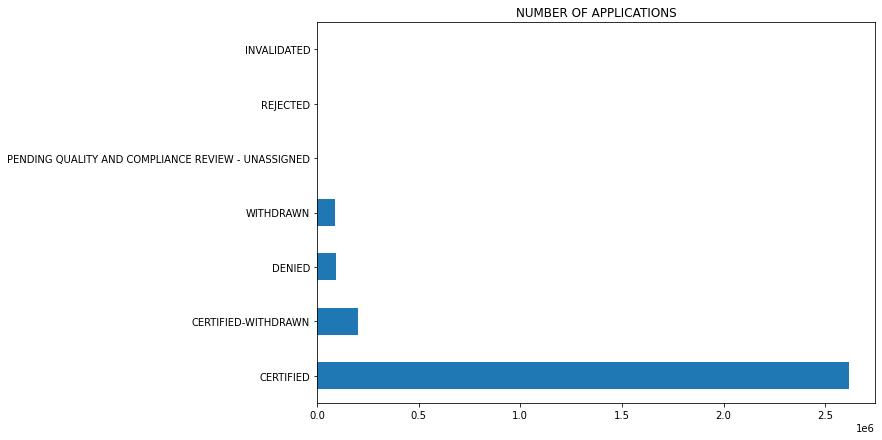

In [6]:
plt.figure(figsize=(10,7))
df.CASE_STATUS.value_counts().plot(kind='barh')
df.sort_values('CASE_STATUS')
plt.title("NUMBER OF APPLICATIONS")
plt.show()

      Number of Applications per year

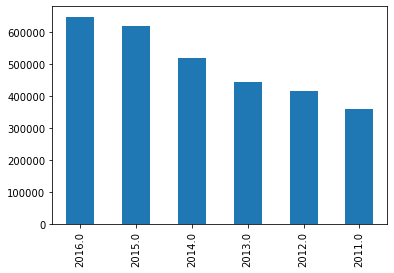

In [7]:
df.YEAR.value_counts().plot(kind = 'bar')

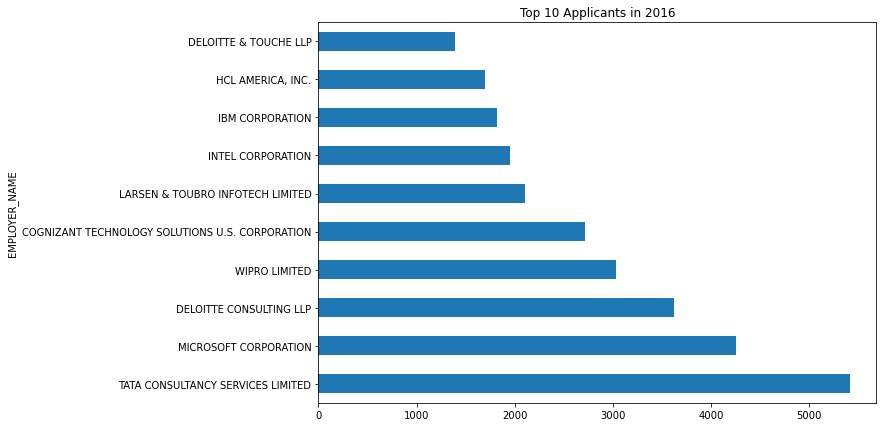

In [8]:
plt.figure(figsize=(10,7))

ax1 = df['EMPLOYER_NAME'][df['YEAR'] == 2011].groupby(df['EMPLOYER_NAME']).count().sort_values(ascending=False).head(10).plot(kind='barh', title = "Top 10 Applicants in 2016")
ax1.set_label("")
plt.show()

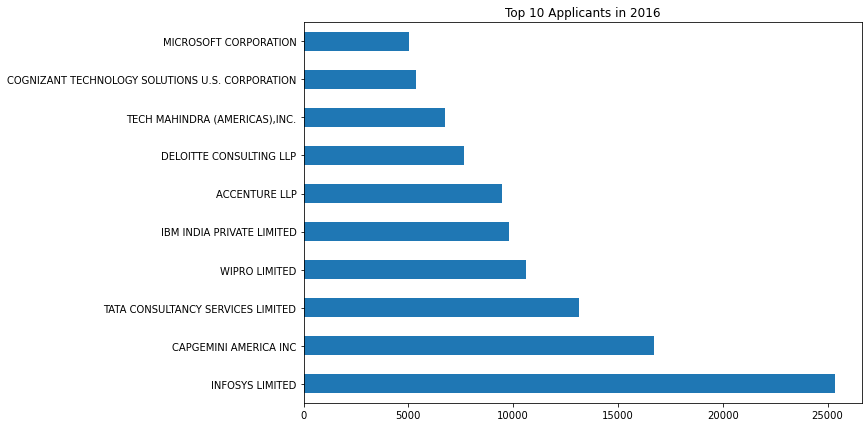

In [9]:
plt.figure(figsize=(10,7))

ax2 = df['EMPLOYER_NAME'][df['YEAR'] == 2016].groupby(df['EMPLOYER_NAME']).count().sort_values(ascending=False).head(10).plot(kind='barh', title='Top 10 Applicants in 2016'
                                                                                                                             )
ax2.set_ylabel("")
plt.show()

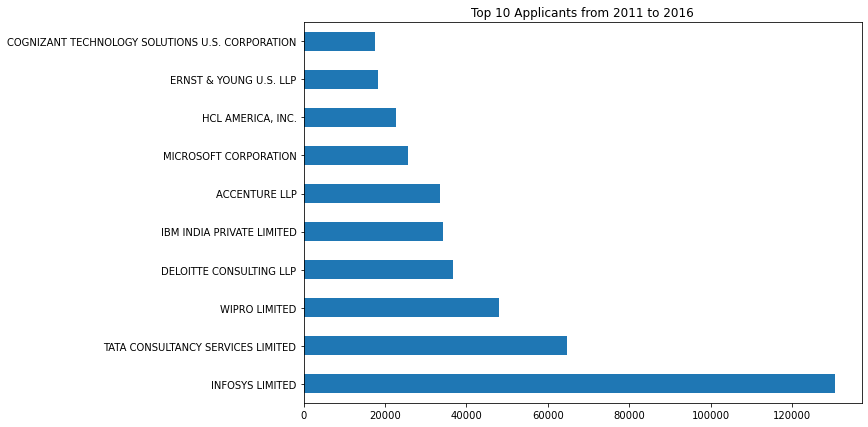

In [10]:
plt.figure(figsize=(10,7))

ax3 = df['EMPLOYER_NAME'].groupby([df['EMPLOYER_NAME']]).count().sort_values(ascending=False).head(10).plot(kind = 'barh', title = 'Top 10 Applicants from 2011 to 2016')
                                                                                                           
ax3.set_ylabel("")
plt.show()

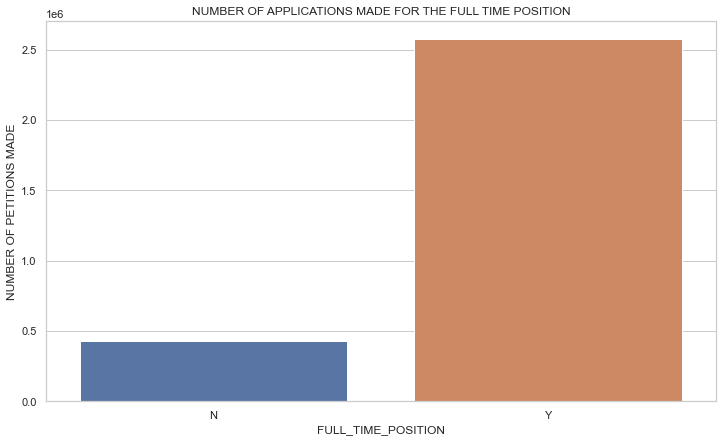

In [11]:
plt.figure(figsize=(12,7))
sns.set(style="whitegrid")
g = sns.countplot(x = 'FULL_TIME_POSITION', data = df)
plt.title("NUMBER OF APPLICATIONS MADE FOR THE FULL TIME POSITION")
plt.ylabel("NUMBER OF PETITIONS MADE")
plt.show()

In [12]:
top_emp = list(df['EMPLOYER_NAME'][df['YEAR'] >= 2015].groupby(df['EMPLOYER_NAME']).count().sort_values(ascending=False).head(10).index)

byempyear = df[['EMPLOYER_NAME', 'YEAR', 'PREVAILING_WAGE']][df['EMPLOYER_NAME'].isin(top_emp)]

byempyear = byempyear.groupby([df['EMPLOYER_NAME'], df['YEAR']])

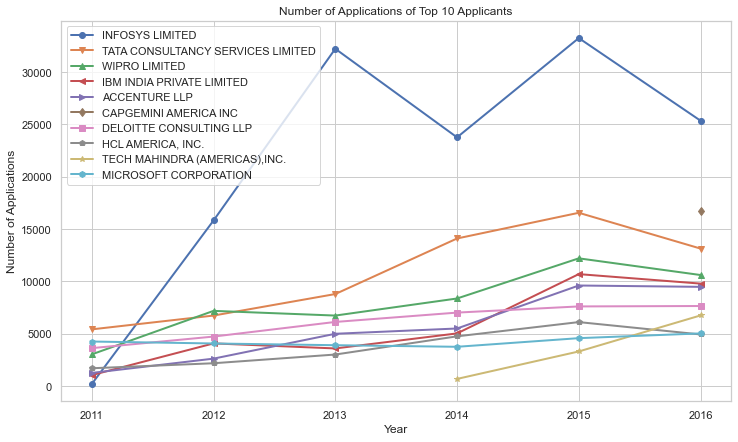

In [13]:
plt.figure(figsize=(12,7))

markers=['o','v','^','<','>','d','s','p','*','h','x','D','o','v','^','<','>','d',
         's','p','*','h','x','D']

for company in top_emp:
    tmp = byempyear.count().loc[company]
    plt.plot(tmp.index.values, tmp["PREVAILING_WAGE"].values, label=company,
             linewidth=2,marker=markers[top_emp.index(company)])
plt.xlabel("Year")
plt.ylabel("Number of Applications")
plt.legend()
plt.title('Number of Applications of Top 10 Applicants')
plt.show()

## Removing Outliers

In [14]:
df = df[df['PREVAILING_WAGE'] <= 500000]
by_emp_year = df[['EMPLOYER_NAME', 'YEAR', 'PREVAILING_WAGE']][df['EMPLOYER_NAME'].isin(top_emp)]
by_emp_year = by_emp_year.groupby([df['EMPLOYER_NAME'],df['YEAR']])

## Checking for null values

In [15]:

df.isnull().sum()

Unnamed: 0                 0
CASE_STATUS                0
EMPLOYER_NAME             42
SOC_NAME               17698
JOB_TITLE                 26
FULL_TIME_POSITION         0
PREVAILING_WAGE            0
YEAR                       0
WORKSITE                   0
lon                   107089
lat                   107089
dtype: int64

In [16]:
df['SOC_NAME'] = df['SOC_NAME'].fillna(df['SOC_NAME'].mode()[0])

In [17]:
df.isnull().sum()

Unnamed: 0                 0
CASE_STATUS                0
EMPLOYER_NAME             42
SOC_NAME                   0
JOB_TITLE                 26
FULL_TIME_POSITION         0
PREVAILING_WAGE            0
YEAR                       0
WORKSITE                   0
lon                   107089
lat                   107089
dtype: int64

## Label enconding the CASE_STATUS feature

In [18]:
df['CASE_STATUS'] = df['CASE_STATUS'].map({'CERTIFIED' : 0, 'CERTIFIED-WITHDRAWN' : 1, 'DENIED' : 2,'WITHDRAWN' : 3,'PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED' : 4,'REJECTED' : 5, 'INVALIDATED' : 6})

In [19]:
df['FULL_TIME_POSITION'] = df['FULL_TIME_POSITION'].map({'N' : 0, 'Y' : 1})
df.head()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,1,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,0,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,2,1,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,1,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,3,1,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,1,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,4,1,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",1,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
4,5,3,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,1,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003


In [20]:
import sys
df['SOC_NAME1'] = 'others'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('computer','software')] = 'it'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('chief','management')] = 'manager'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('mechanical')] = 'mechanical'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('database')] = 'database'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('sales','market')] = 'scm'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('financial')] = 'finance'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('public','fundraising')] = 'pr'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('education','law')] = 'administrative'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('auditors','compliance')] = 'audit'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('distribution','logistics')] = 'scm'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('recruiters','human')] = 'hr'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('agricultural','farm')] = 'agri'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('construction','architectural')] = 'estate'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('forencsic','health')] = 'medical'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('teachers')] = 'education'

C:\Users\ASUS\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ASUS\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\ASUS\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

In [21]:
df = df.drop(['Unnamed: 0', 'EMPLOYER_NAME', 'SOC_NAME','JOB_TITLE','WORKSITE', 'lon','lat'], axis = 1)

In [22]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df.SOC_NAME1)
# print list(le.classes_)
df['SOC_N']=le.transform(df['SOC_NAME1'])

In [23]:
df = df.drop(['SOC_NAME1'], axis=1)

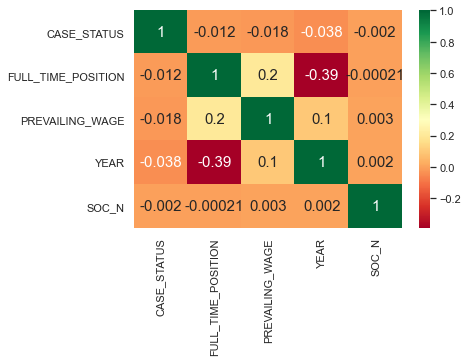

In [24]:
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})

In [25]:
selcols=["FULL_TIME_POSITION","PREVAILING_WAGE","YEAR","SOC_N"]
x=pd.DataFrame(df,columns=selcols)
y=pd.DataFrame(df,columns=['CASE_STATUS'])

In [26]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

##Model Fitting by using Random Forest Classifier

In [27]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)


C:\Users\ASUS\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier()

In [28]:
y_pred_rf =rf.predict(x_test)
print(y_pred_rf)

[0 0 0 ... 0 0 0]


In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf))

C:\Users\ASUS\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.88      0.99      0.93    784458
           1       0.47      0.09      0.16     60711
           2       0.25      0.04      0.07     27545
           3       0.14      0.01      0.02     27253
           4       0.00      0.00      0.00         6
           6       0.00      0.00      0.00         1

    accuracy                           0.87    899974
   macro avg       0.29      0.19      0.20    899974
weighted avg       0.81      0.87      0.82    899974



C:\Users\ASUS\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
c(y_pred_rf)

Counter({0: 881670, 1: 12081, 2: 4528, 3: 1695})

In [31]:
accuracy = accuracy_score(y_test,y_pred_rf)
accuracy

0.8688162102460738

In [32]:
import pickle
pickle.dump(rf,open('Visarf.pkl','wb'))